In [4]:
# imports
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from scipy import signal
from librosa import feature
import antropy as ant
from sklearn import preprocessing
from scipy.stats import entropy
import pandas as pd
from pywt import wavedec #multilevel dwt 

In [5]:
#reading wav files
sampleN = read("sampleN.wav")
sampleAS = read("sampleAS.wav")
sampleMR = read("sampleMR.wav")
sampleMS = read("sampleMS.wav")
sampleMVP = read("sampleMVP.wav")

In [6]:
#Initialising figure size and layoutting
plt.rcParams["figure.figsize"] = [20, 13]
plt.rcParams["figure.autolayout"] = True
par = {'axes.titlesize':22, 'figure.titlesize': 26}
plt.rcParams.update(par)

In [7]:
#Normalising first 1s of each of the waveforms
normN, normAS, normMR, normMS, normMVP = [], [], [], [], []
for i in range(10000):  #11250 => first 1.125s of sample
    normN.append(sampleN[1][i]/32768) 
    normAS.append(sampleAS[1][i]/32768)
    normMR.append(sampleMR[1][i]/32768) 
    normMS.append(sampleMS[1][i]/32768)  
    normMVP.append(sampleMVP[1][i]/32768) 
    
    
#scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
#normN = scaler.fit_transform(sampleN[:10000])
#normAS = scaler.fit_transform(sampleAS[:10000])
#normMR = scaler.fit_transform(sampleMR[:10000])
#normMS = scaler.fit_transform(sampleMS[:10000])
#normMVP = scaler.fit_transform(sampleMVP[:10000])


#minN, maxN = min(sampleN[1][:10000]), max(sampleN[1][:10000])
#minAS, maxAS = min(sampleAS[1][:10000]), max(sampleAS[1][:10000])
#minMR, maxMR = min(sampleMR[1][:10000]), max(sampleMR[1][:10000])
#minMS, maxMS = min(sampleMS[1][:10000]), max(sampleMS[1][:10000])
#minMVP, maxMVP = min(sampleMVP[1][:10000]), max(sampleMVP[1][:10000])
#for i in range(10000):
#    normN.append((sampleN[1][i]-minN)/(maxN-minN))
#    normAS.append((sampleAS[1][i]-minAS)/(maxAS-minAS))
#    normMR.append((sampleMR[1][i]-minMR)/(maxMR-minMR))
#    normMS.append((sampleMS[1][i]-minMS)/(maxMS-minMS))
#    normMVP.append((sampleMVP[1][i]-minMVP)/(maxMVP-minMVP))

In [22]:
def mulFeatPlots(plotWave, winl, hopl, title):
#This function plots raw pcg, zero-crossings, rms energy, spectral entropy for input wave. 
#winl is Window Length, hl is Hop Length for the windows 
    
    #Raw pcg
    ax1 = plt.subplot2grid(shape=(7,1), loc=(0,0))
    ax1.plot(plotWave)
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.title("Raw PCG")
    
    #Zero-crossings 
    ax2 = plt.subplot2grid((7,1), (1,0))
    zcrWave = feature.zero_crossing_rate(np.array(plotWave), frame_length=winl, hop_length = hopl, center = True)
    ax2.plot(zcrWave[0])
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.title("Zero Crossings Rate")
    
    #Energy
    ax2 = plt.subplot2grid((7,1), (2,0))
    #rmsWave = feature.rms(y = np.array(plotWave), frame_length=winl, hop_length = hopl, center = True)
    enWave = []
    for i in range(len(plotWave)):
        if i<(len(plotWave)-winl):
            energy = 0
            for j in range(winl):
                energy+=(plotWave[i+j])**2
            enWave.append(energy)
        else:
            energy = 0
            for j in range(len(plotWave)-i):
                energy+=(plotWave[i+j])**2
            enWave.append(energy)
    ax2.plot(enWave)
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.title("Energy")
    
    """
    #Spectral Entropy(Shannon Entropy of the Power Spectral Density)
    entWave = []
    for i in range(len(plotWave)):  #This part automatically takes hopl = 1. Will fix later
        if i<(len(plotWave)-winl):
            entWave.append(ant.spectral_entropy(plotWave[i:(i+winl)], sf = 8000, method = 'fft', normalize = True))
        else:
            entWave.append(ant.spectral_entropy(plotWave[i:], sf = 8000, method = 'fft', normalize = True))
    ax2 = plt.subplot2grid((4,1), (3,0))
    ax2.plot(entWave)
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.title("Spectral Entropy")
    
    plt.suptitle(title)
    plt.show()
    """
    #Shannon Entropy plotted by windowing
    entWave = []
    for i in range(len(plotWave)):
        if i<(len(plotWave)-winl):
            pdSer = pd.Series(plotWave[i:i+winl])
            counts = pdSer.value_counts()
            entWave.append(entropy(counts)/np.log(winl))
        #else:
         #   pdSer = pd.Series(plotWave[i:])
          #  counts = pdSer.value_counts()
           # entWave.append(entropy(counts)/np.log((len(plotWave)-i)))
    #entWave=entWave[:9950]
    ax2 = plt.subplot2grid((7,1), (3,0))
    ax2.plot(entWave)
    plt.xlim([0,10000])
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.title("Shannon Entropy")
    
    #dwt
    dwt = wavedec(plotWave, 'haar', level=2)
    dwt1= dwt[0]
    ax2 = plt.subplot2grid((7,1), (4,0))
    ax2.plot(dwt1)
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.title('DWT: First Mode')
    
    ax2 = plt.subplot2grid((7,1), (5,0))
    dwt2 = dwt[1]
    ax2.plot(dwt2)
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.title('DWT: Second Mode')
    
    ax2 = plt.subplot2grid((7,1), (6,0))
    dwt3 = dwt[2]
    ax2.plot(dwt3)
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.title('DWT: Third Mode')
    
    plt.suptitle(title)
    plt.show()

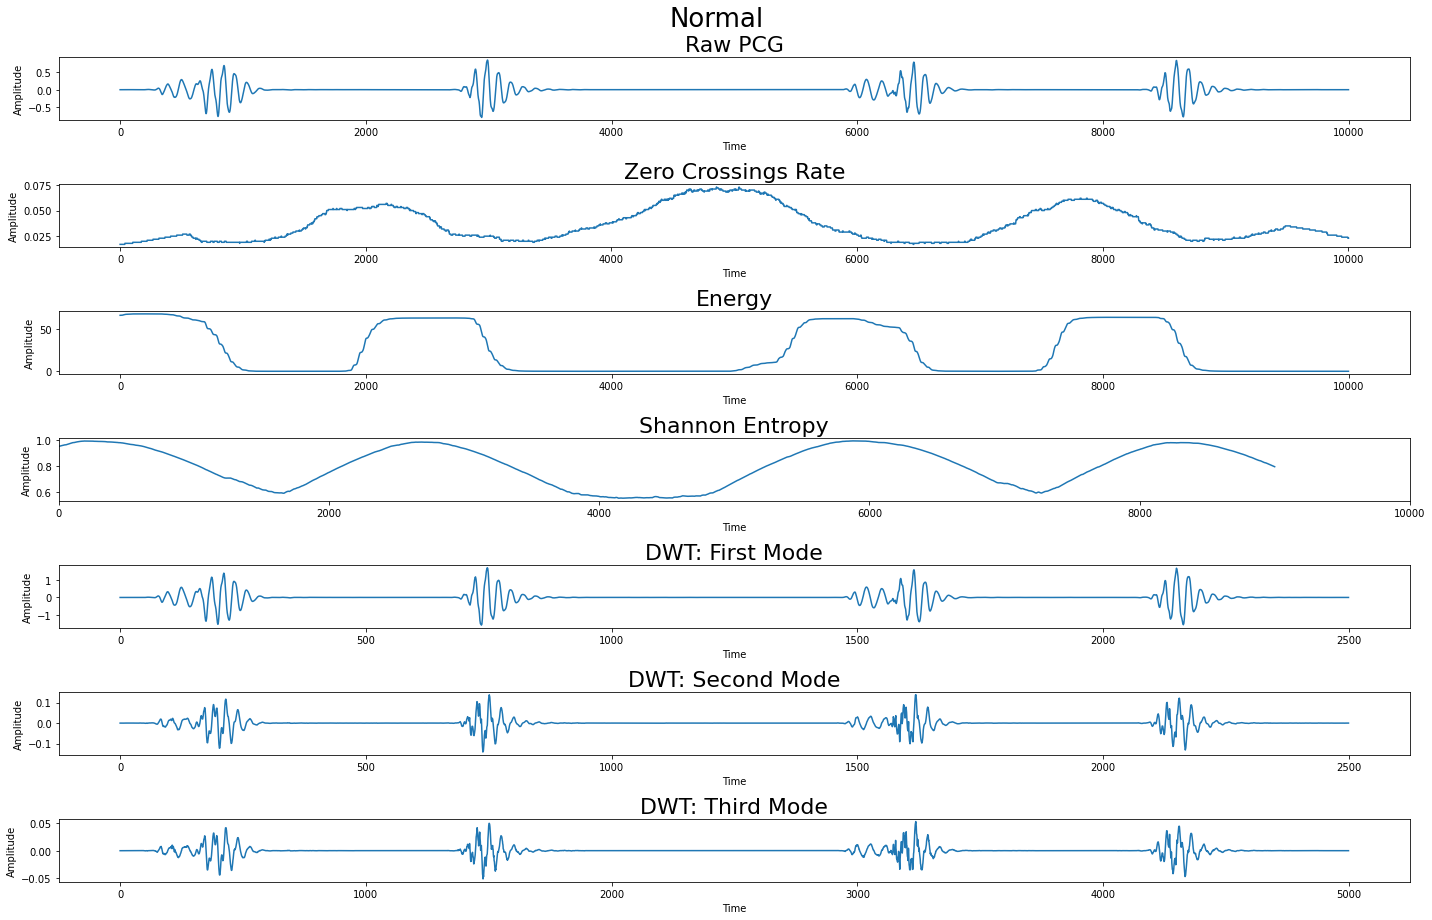

In [23]:
mulFeatPlots(normN, 1000, 1, 'Normal')

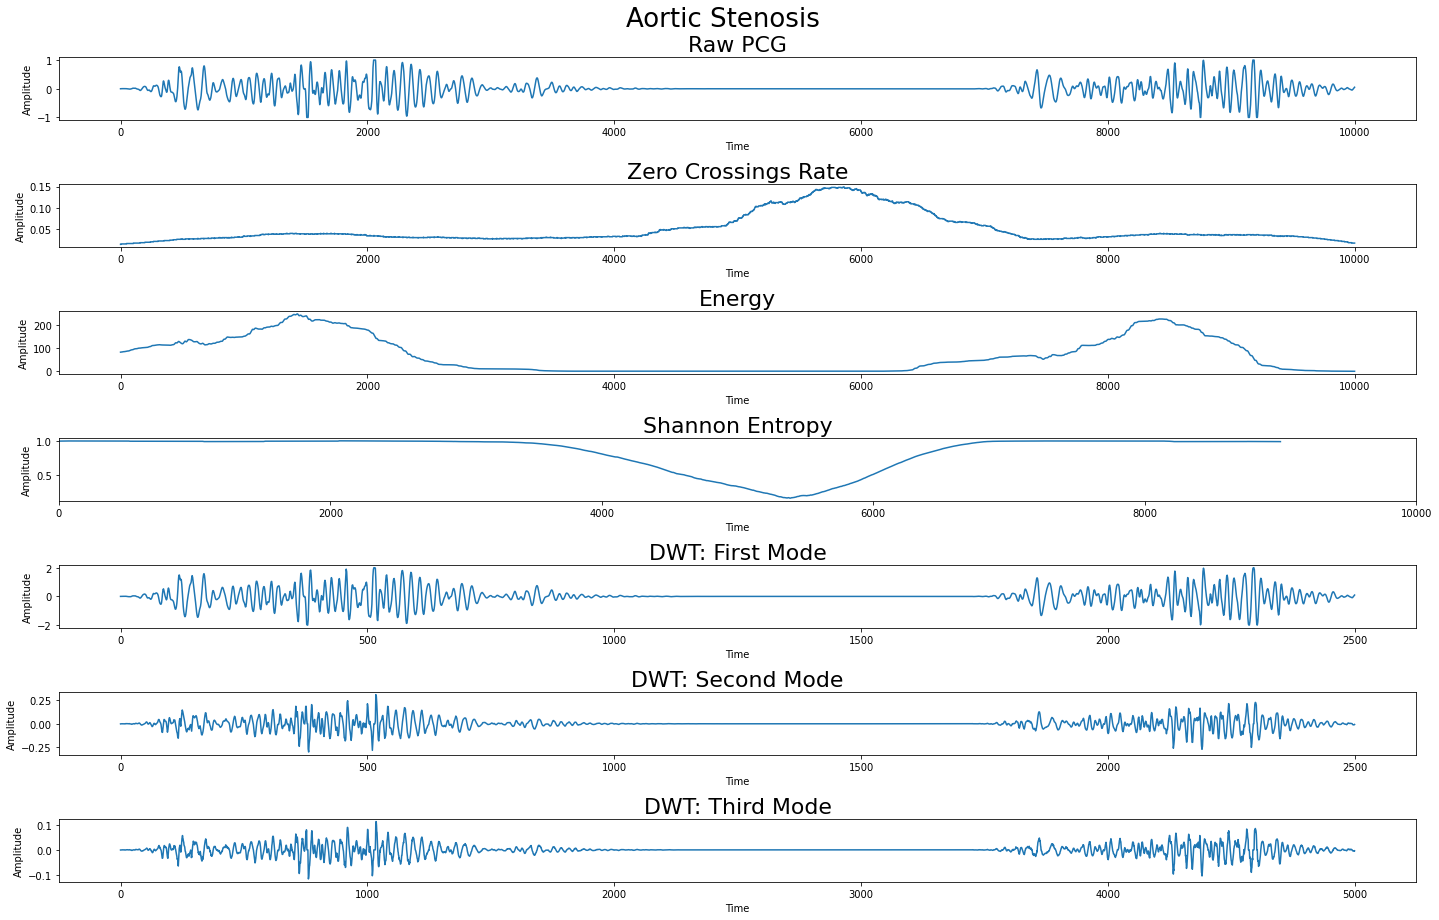

In [24]:
mulFeatPlots(normAS, 1000, 1, 'Aortic Stenosis')

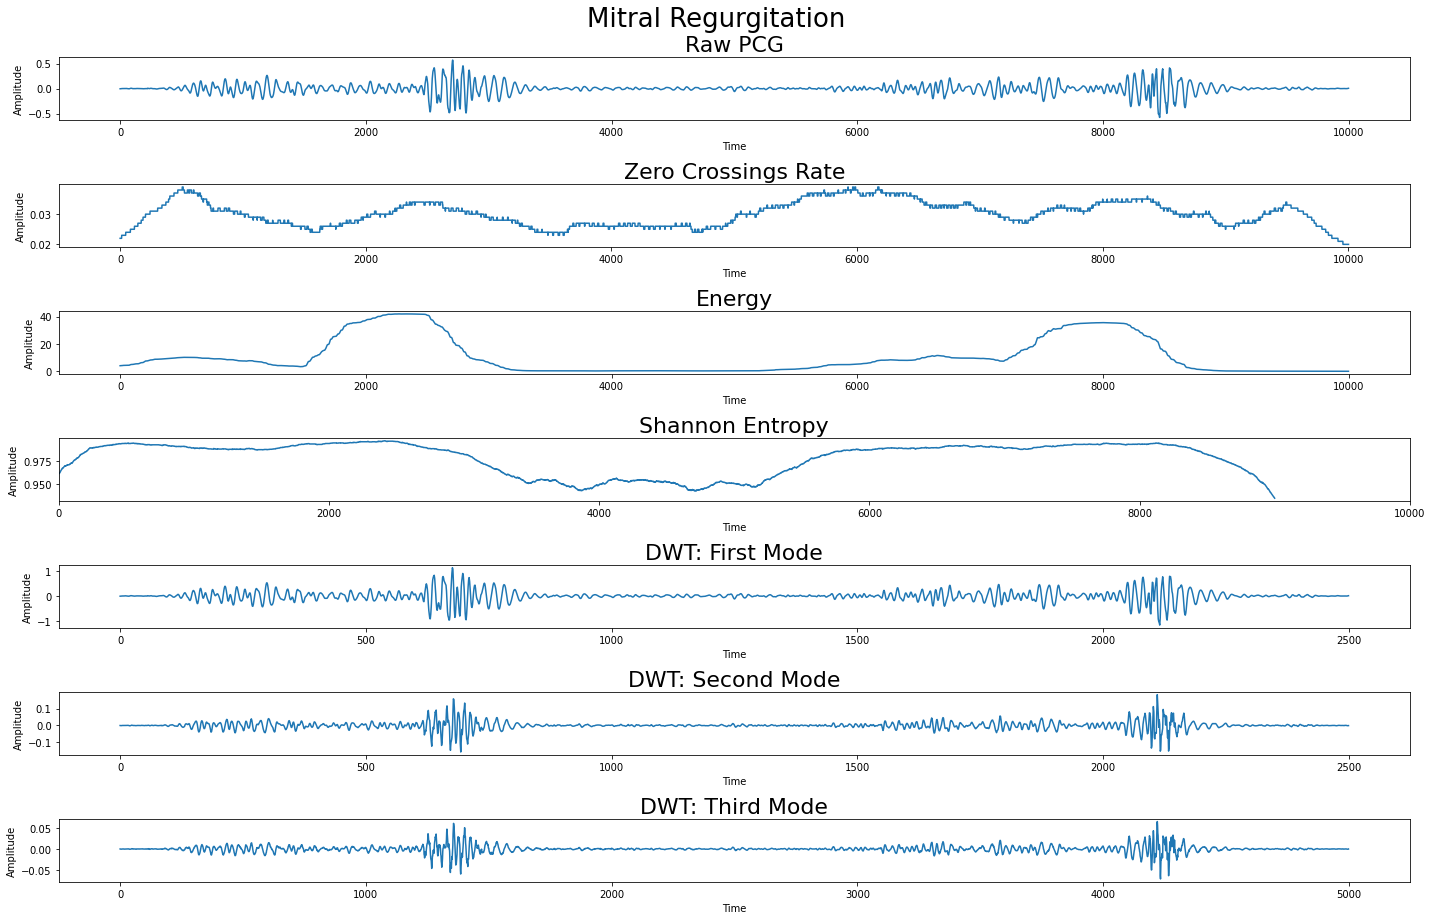

In [25]:
mulFeatPlots(normMR, 1000, 1, 'Mitral Regurgitation')

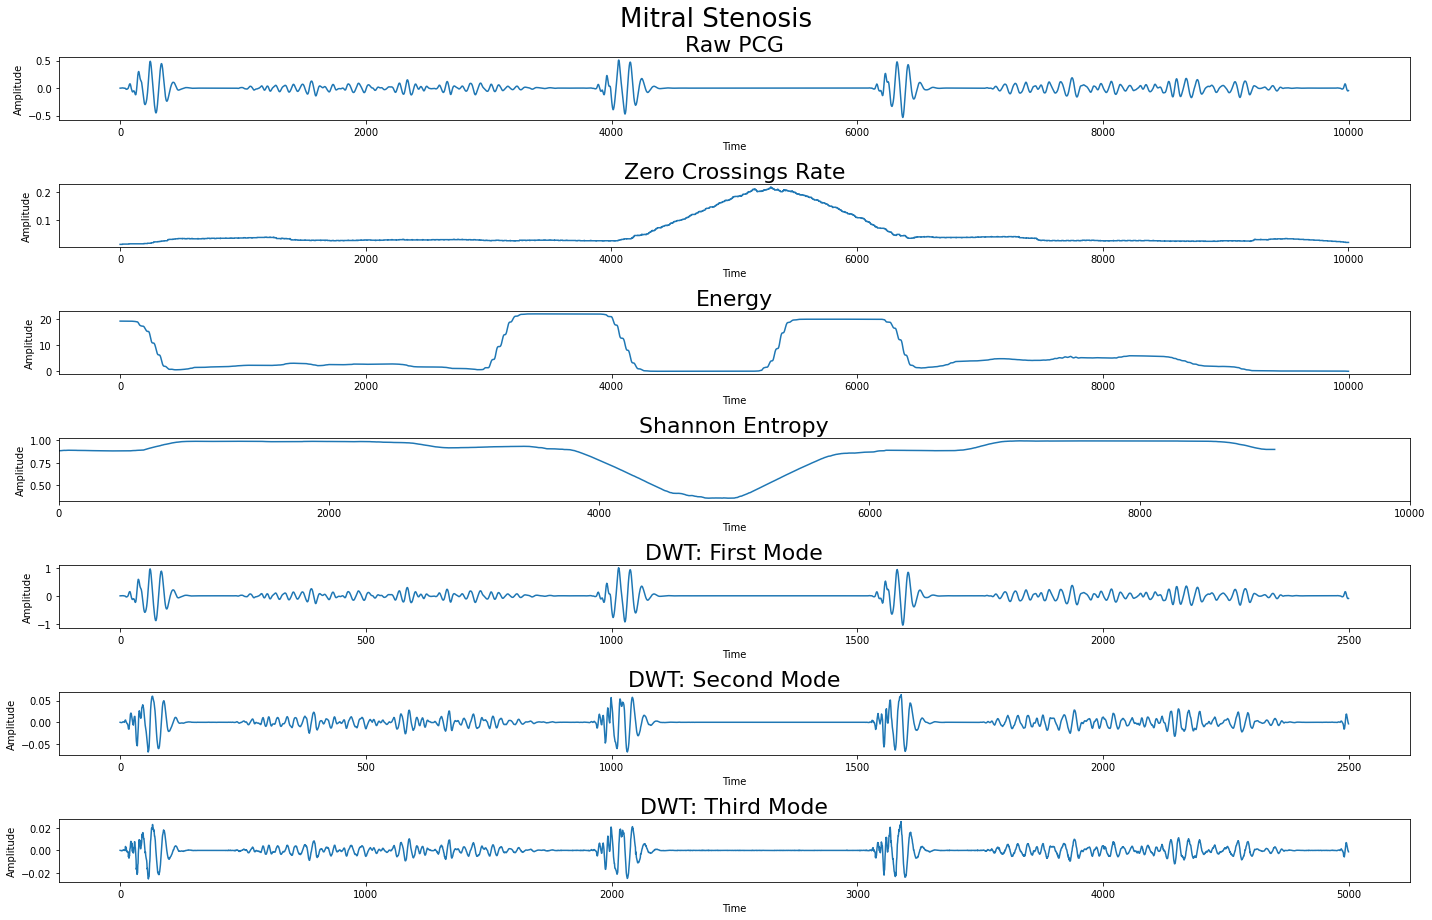

In [26]:
mulFeatPlots(normMS, 1000, 1, 'Mitral Stenosis')

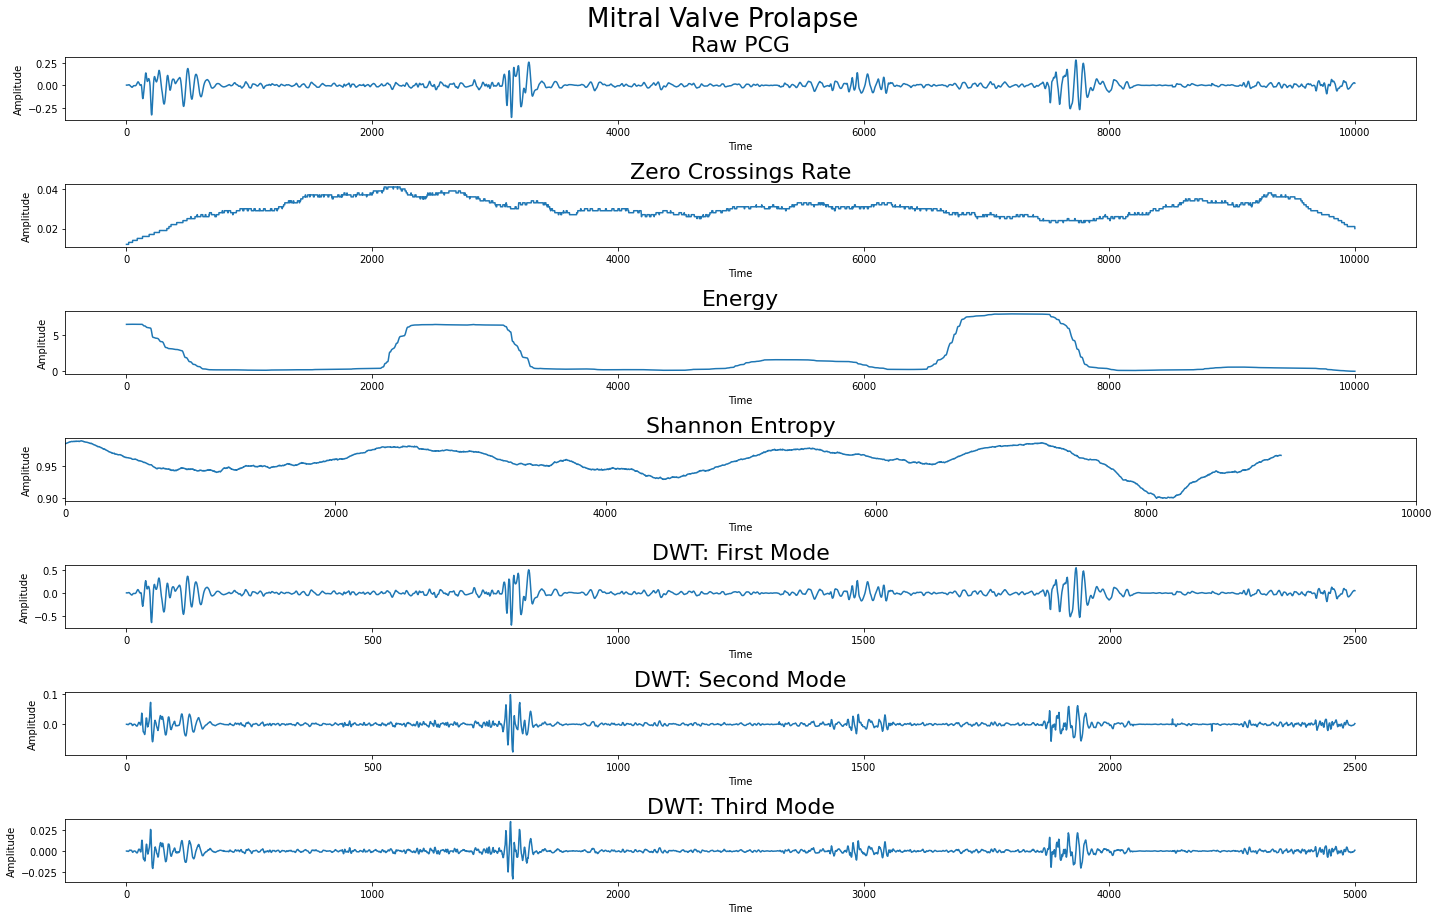

In [27]:
mulFeatPlots(normMVP, 1000, 1, 'Mitral Valve Prolapse')